## モンテカルロ法の実装

In [1]:
%load_ext lab_black

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../"))

import numpy as np
from collections import defaultdict
from common.gridworld import GridWorld

#### エージェントクラスの実装

In [3]:
class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.experience = []

    def get_action(self, state):
        ps = self.pi[state]
        actions, probs = list(ps.keys()), list(ps.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        data = (state, action, reward)
        self.experience.append(data)

    def reset(self):
        self.experience.clear()

    def eval(self):
        g = 0
        for data in reversed(self.experience):
            state, action, reward = data
            g = self.gamma * g + reward
            self.cnts[state] += 1
            self.V[state] += (g - self.V[state]) / self.cnts[state]

#### モンテカルロ法を実行

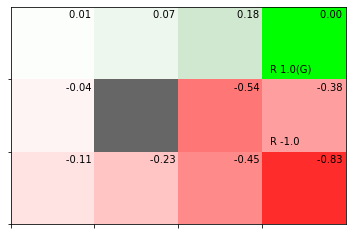

In [4]:
env = GridWorld()
agent = RandomAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.add(state, action, reward)
        if done:
            agent.eval()
            break

        state = next_state

env.render_v(agent.V)